## Problem 1

The aim of this exercise is to verify, for some specific examples, that i\) **OLS estimators are consistent** and ii\) **asymptotically normal**, and that iii\) **our F statistics follow F distributions in large samples**
without assuming that the error terms u are normally distributed. To do so, we will perform Monte Carlo simulations in Stata.

In the following we assume that the population model is this regression

 $$y=\beta_0+\beta_1x_1+\beta_2x_2+u_i$$

and we also assume that $x$ and $u$ are independent and $x_1 ∼ Uniform(0, 1), x_2 ∼ Binomial(1, 0.3)$ and $u + 1 ∼ \chi^2(1)$.

1. Generate a dataset of 1000 observations that contains $x_1 ∼ Uniform(0, 1)$ and $u + 1 ∼ χ2(1)$. Plot both $x_1$ and $u$.

In [27]:
#Calling packages
using Distributions, Plots, DataFrames, Statistics, GLM, StatsModels, HypothesisTests

In [2]:
# Generate the two random variables 
x_1 = rand(1000)
chi_vals = rand(Chisq(1), 1000)
u = chi_vals .- 1

1000-element Vector{Float64}:
 -0.5362322625030804
 -0.7679237349165235
 -0.8814178594995772
 -0.41976291012129907
 -0.4782308123830056
 -0.9999920127072042
 -0.9848860022010714
  0.9174035119558697
  5.086096142844842
 -0.6530018152270767
  ⋮
 -0.6655497634489094
 -0.9635672096549082
 -0.9494930192456544
  0.8182164913272167
  0.9693469692402348
 -0.1971816466889439
 -0.8774808264575593
  0.9552930853630079
 -0.8488784169323769

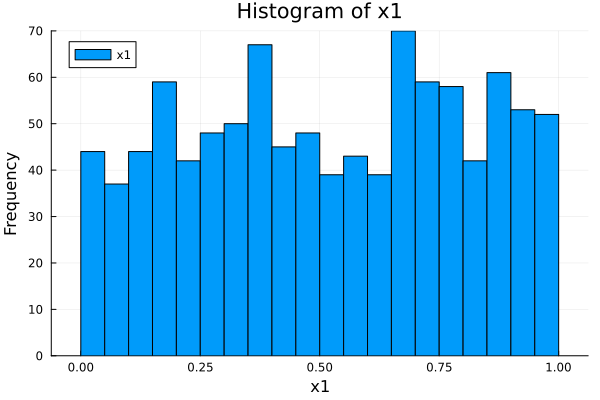

In [3]:
# Plot the histogram of x_1
histogram(x_1, bins=30, title="Histogram of x1", xlabel="x1", ylabel="Frequency", label = "x1")

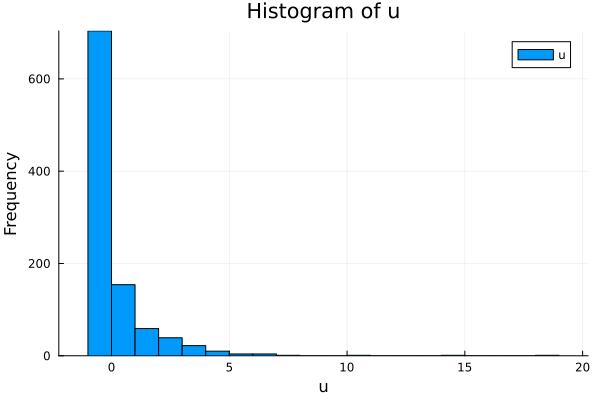

In [4]:
# Plot the histogram of u
histogram(u, bins=30, title="Histogram of u", xlabel="u", ylabel="Frequency", label = "u")

2. Now that you know how to draw random variables, clear all data and follow these steps:

    (a) Define a program (in Stata) or a function (in other languages) that generates $u + 1 ∼ \chi^2(1)$ over $N = 5$ observations and retrieves the mean and standard deviation of the generated sample

In [5]:
# Define the function to generate the random variables
function f(N)
    u_plus_1= rand(Chisq(1), N)
    u= u_plus_1 .- 1
    return mean(u), std(u)
end

f (generic function with 1 method)

In [6]:
# Run the function with 5 observations
df_5 = f(5)
first_element = df_5[1]
second_element = df_5[2]
println("The mean of u with 5 observations is ", first_element, " and the standard deviation is ", second_element)

The mean of u with 5 observations is -0.5631637279989619 and the standard deviation is 0.611576422858746


    (b) Simulate the program 10 000 times. you should obtain a dataset with a variable for the mean and one for the standard deviation

In [7]:
# Run the function for 10000 times
n=10000
mean_vals = zeros(n)
sd_vals = zeros(n)
for i in 1:n
    mean_vals[i], sd_vals[i] = f(5)
end

In [8]:
# Generate a new dataframe using the mean and standard deviation values
df = DataFrame(mean_vals = mean_vals, sd_vals = sd_vals)
# Display the first 5 rows of the dataframe to check
first(df, 5)

Row,mean_vals,sd_vals
,Float64,Float64
1,0.645411,1.32482
2,-0.119597,0.771718
3,0.676251,2.6779
4,0.837662,3.26478
5,-0.769484,0.235702


(c) Summarize and plot a histogram of the mean variable

In [9]:
# Summarize the mean variable
mean_summary = describe(select(df, [:mean_vals]))

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Int64,DataType
1,mean_vals,0.00105668,-0.978328,-0.128278,5.56673,0,Float64


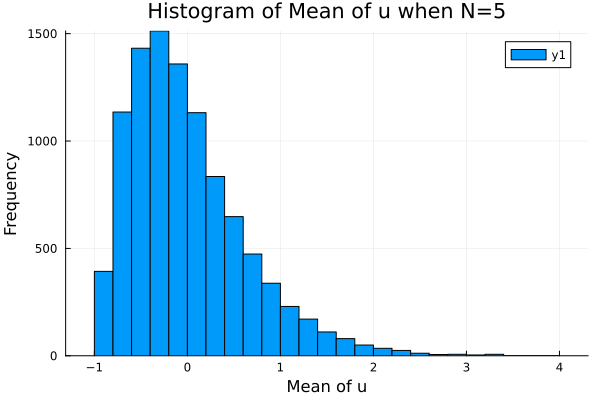

In [ ]:
# Plot the histogram of the mean variable
histogram(mean_vals, bins=30, title="Histogram of Mean of u when N=5", xlabel="Mean of u", ylabel="Frequency", label = "Mean of u")

3. Repeat the simulation in 2) but for different programs with $N = 10, 100$ and $ 1000$. Calculate the
summary statistics of each of the mean variables obtained. What do you observe?

In [10]:
# For N=10 
mean_vals = zeros(n)
sd_vals = zeros(n)
for i in 1:n
    mean_vals[i], sd_vals[i] = f(10)
end
df_10 = DataFrame(mean_vals = mean_vals, sd_vals = sd_vals)
mean_summary_10 = describe(select(df_10, [:mean_vals]))
std_df_10= std(df_10.mean_vals)
println(mean_summary_10)
println("The standard deviation of the mean of u when N=10 is ", std_df_10)

1×7 DataFrame
 Row │ variable   mean        min        median      max      nmissing  eltype   
     │ Symbol     Float64     Float64    Float64     Float64  Int64     DataType 
─────┼───────────────────────────────────────────────────────────────────────────
   1 │ mean_vals  0.00551852  -0.916837  -0.0633377  2.50334         0  Float64
The standard deviation of the mean of u when N=10 is 0.44632626707988504


In [11]:
# For N=100
mean_vals = zeros(n)
sd_vals = zeros(n)
for i in 1:n
    mean_vals[i], sd_vals[i] = f(100)
end
df_100 = DataFrame(mean_vals = mean_vals, sd_vals = sd_vals)
mean_summary_100 = describe(select(df_100, [:mean_vals]))
std_df_100= std(df_100.mean_vals)
println(mean_summary_100)
println("The standard deviation of the mean of u when N=100 is ", std_df_100)

1×7 DataFrame
 Row │ variable   mean        min        median      max      nmissing  eltype   
     │ Symbol     Float64     Float64    Float64     Float64  Int64     DataType 
─────┼───────────────────────────────────────────────────────────────────────────
   1 │ mean_vals  0.00201469  -0.482018  -0.0027562  0.66733         0  Float64
The standard deviation of the mean of u when N=100 is 0.14172076028506694


In [12]:
# For N=1000
mean_vals = zeros(n)
sd_vals = zeros(n)
for i in 1:n
    mean_vals[i], sd_vals[i] = f(1000)
end
df_1000 = DataFrame(mean_vals = mean_vals, sd_vals = sd_vals)
mean_summary_1000 = describe(select(df_1000, [:mean_vals]))
std_df_1000= std(df_1000.mean_vals)
println(mean_summary_1000)
println("The standard deviation of the mean of u when N=1000 is ", std_df_1000)

1×7 DataFrame
 Row │ variable   mean         min        median        max       nmissing  eltype   
     │ Symbol     Float64      Float64    Float64       Float64   Int64     DataType 
─────┼───────────────────────────────────────────────────────────────────────────────
   1 │ mean_vals  0.000465585  -0.161931  -0.000671823  0.197851         0  Float64
The standard deviation of the mean of u when N=1000 is 0.04534425704285963


As $N$ increases, the mean gets closer to 0.

4. Take the standard deviation of the mean variable in 3\) when $N = 10$. Multiply with $\sqrt{10}/\sqrt{100}$ and $\sqrt{10}/\sqrt{1000}$ respectively and compare this to the results in 3\). Explain what you see. What sample size would you need to obtain a standard deviation of about $0.001$?

In [13]:
std_df10_2=std_df_10*(√10/√100)
std_df10_3=std_df_10*(√10/√1000)
std_df10_4=std_df_10*(√10/√1000000)
println("The standard deviation of the mean of u when N=10 is ", std_df_10)
println("Multiplying it by √10/√100 gives ", std_df10_2)
println("Multiplying it by √10/√1000 gives ", std_df10_3)
println("Multiplying it by √10/√1000000 gives ", std_df10_4)

The standard deviation of the mean of u when N=10 is 0.44632626707988504
Multiplying it by √10/√100 gives 0.1411407583533066
Multiplying it by √10/√1000 gives 0.04463262670798851
Multiplying it by √10/√1000000 gives 0.001411407583533066


By multiplying the standard deviation when $N=10$ by $\sqrt{10}/\sqrt{100}$ gives the same standard deviation as when $N=100$.

And multiplying it by $\sqrt{10}/\sqrt{1000}$ gives the same as when $N=1000$.

This phenomenon appears because of the way we calculate standard deviation of the mean $SD=\frac{\sigma}{\sqrt{N}}$

Then the scaling of standard deviation when $M$ observation and $N$ observations follows this function $\sigma_M=\sigma_N \cdot \sqrt{\frac{N}{M}}$

If we want the standard deviation to get closer to $0.001$, we need about $N=1000000$.

5. Run the same simulations as in 3), but now inspect the distribution of the variable using a histogram. What do you observe?

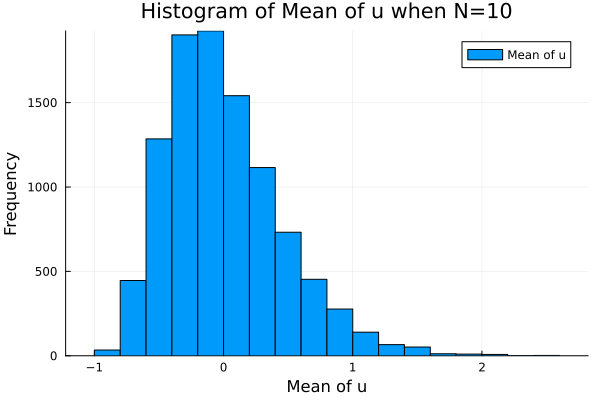

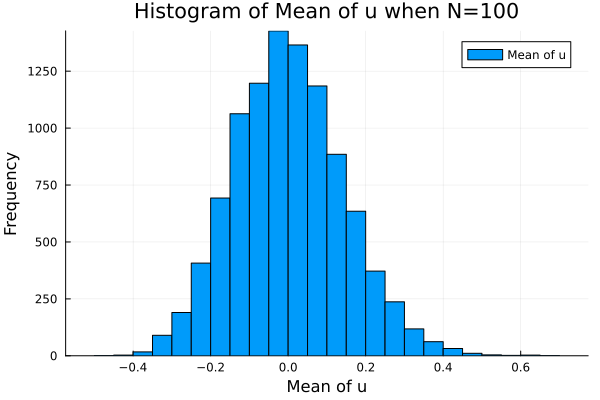

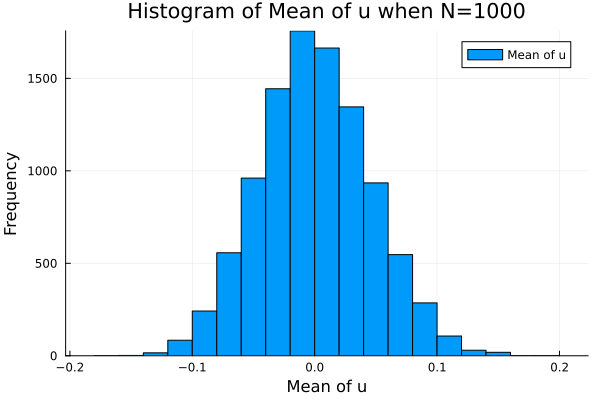

In [14]:
# Plot the histogram of the mean variable
hist_10=histogram(df_10.mean_vals, bins=30, title="Histogram of Mean of u when N=10", xlabel="Mean of u", ylabel="Frequency", label="Mean of u")
hist_100=histogram(df_100.mean_vals, bins=30, title="Histogram of Mean of u when N=100", xlabel="Mean of u", ylabel="Frequency", label="Mean of u")
hist_1000=histogram(df_1000.mean_vals, bins=30, title="Histogram of Mean of u when N=1000", xlabel="Mean of u", ylabel="Frequency", label="Mean of u") 
display(hist_10)
display(hist_100)
display(hist_1000)

As $N$ gets larger, the mean gets closer to 0 and the spreads get narrower; the distribution becomes more like a normal distribution as the Central Limit Theorem takes effect.

6. Set up a program or function that does the following for $N = 10$:

    (a) Clear all variables and set number of observations to $N$

    (b) Generate $x_1, x_2, u, y$ where $y = 1 + 2x_1 + 10x_2 + u$

    (c) Regress $y$ on $x_1, x_2$

    (d) Retrieve regression coefficients and standard deviations (6 scalars in total)

Simulate the program 10 000 times



In [15]:
# Define the function to generate the random variables, run the regression and return the coefficients and standard errors
function f(N)
    x_1 = rand(N)
    x_2 = rand(Binomial(1, 0.3), N)
    u_plus_1 = rand(Chisq(1), N)
    u = u_plus_1 .- 1
    y=2x_1+10x_2+u.+1
    df_p6 = DataFrame(x_1 = x_1, x_2 = x_2, y = y, u = u)
    model=lm(@formula(y ~ x_1+x_2), df_p6)
    return coef(model), stderror(model)
end
# Repeat the function for 10000 times
num_params = 3  
n = 10000
coef_vals = zeros(num_params, n)
se_vals = zeros(num_params, n)
for i in 1:n
    coef_vals[:, i], se_vals[:, i] = f(10)
end
# Retrieve the coefficients and standard errors and store them in a dataframe
intercept_coef = coef_vals[1, :]
x1_coef = coef_vals[2, :]
x2_coef = coef_vals[3, :]

intercept_se = se_vals[1, :]
x1_se = se_vals[2, :]
x2_se = se_vals[3, :]
df_sim = DataFrame(intercept_coef = intercept_coef, x1_coef = x1_coef, x2_coef = x2_coef, intercept_se = intercept_se, x1_se = x1_se, x2_se = x2_se)
first(df_sim, 5)


Row,intercept_coef,x1_coef,x2_coef,intercept_se,x1_se,x2_se
,Float64,Float64,Float64,Float64,Float64,Float64
1,1.81644,1.6743,9.64953,1.41618,2.11121,1.16502
2,0.94399,1.67958,18.1177,0.931789,1.75954,1.472
3,1.73062,1.29628,9.56101,0.94414,1.61759,1.11761
4,-0.184694,4.78124,9.22159,1.45398,2.12823,0.840092
5,1.96665,-0.28627,10.6766,1.12404,2.01265,1.09079


7. Using the code in 6), verify that your OLS estimates converge to the population values (set first $N = 10$ and then $N = 1000$). Also inspect their distributions as above, and compare them to the normal distribution. Is there a way to verify whether your estimated standard errors are consistent?

In [16]:
# For N=10 Summarize the coefficients and plot historgrams
coef_summary = describe(select(df_sim, [:intercept_coef, :x1_coef, :x2_coef]))
println(coef_summary)

3×7 DataFrame
 Row │ variable        mean     min         median    max      nmissing  eltype   
     │ Symbol          Float64  Float64     Float64   Float64  Int64     DataType 
─────┼────────────────────────────────────────────────────────────────────────────
   1 │ intercept_coef  1.02535   -4.88324   0.841933  14.0274         0  Float64
   2 │ x1_coef         1.94996  -11.7949    1.95816   12.3848         0  Float64
   3 │ x2_coef         9.70372   -0.126435  9.87924   21.1265         0  Float64


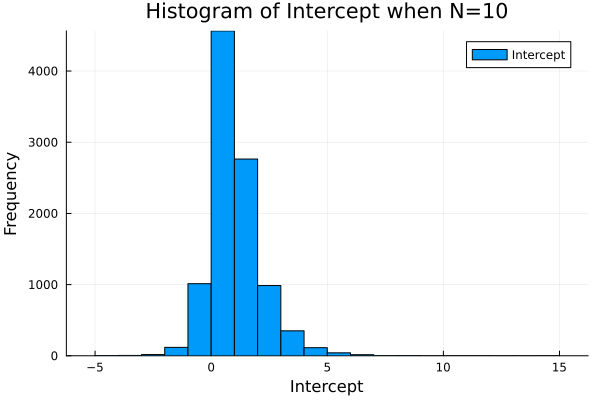

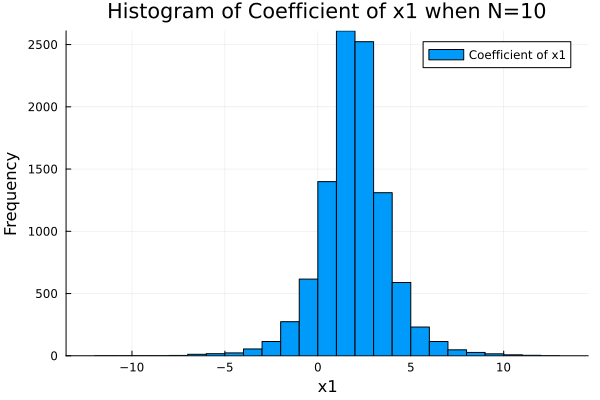

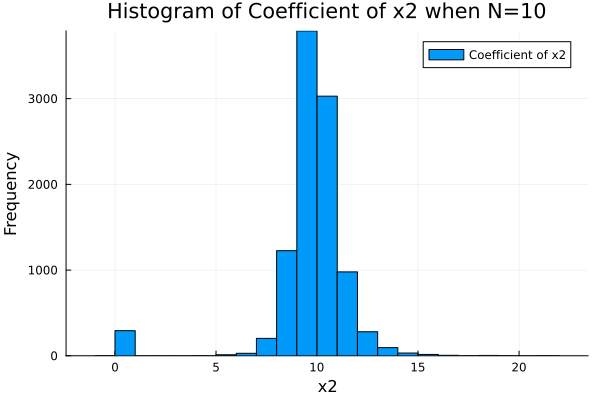

In [17]:
# Plot the histogram of the coefficients
hist_sim_intercept=histogram(df_sim.intercept_coef, bins=30, title="Histogram of Intercept when N=10", xlabel="Intercept", ylabel="Frequency", label="Intercept")
hist_sim_x1=histogram(df_sim.x1_coef, bins=30, title="Histogram of Coefficient of x1 when N=10", xlabel="x1", ylabel="Frequency", label="Coefficient of x1")
hist_sim_x2=histogram(df_sim.x2_coef, bins=30, title="Histogram of Coefficient of x2 when N=10", xlabel="x2", ylabel="Frequency", label="Coefficient of x2")
display(hist_sim_intercept)
display(hist_sim_x1)
display(hist_sim_x2)

In [18]:
# Run the function for 10000 times with N=1000
coef_vals = zeros(num_params, n)
se_vals = zeros(num_params, n)
for i in 1:n
    coef_vals[:, i], se_vals[:, i] = f(1000)
end
intercept_coef = coef_vals[1, :]
x1_coef = coef_vals[2, :]
x2_coef = coef_vals[3, :]

intercept_se = se_vals[1, :]
x1_se = se_vals[2, :]
x2_se = se_vals[3, :]
df_sim2 = DataFrame(intercept_coef = intercept_coef, x1_coef = x1_coef, x2_coef = x2_coef, intercept_se = intercept_se, x1_se = x1_se, x2_se = x2_se)
first(df_sim2, 5)

Row,intercept_coef,x1_coef,x2_coef,intercept_se,x1_se,x2_se
,Float64,Float64,Float64,Float64,Float64,Float64
1,1.08271,1.81172,10.0089,0.0931288,0.153156,0.0975853
2,1.17478,1.88765,9.90789,0.102505,0.168947,0.109418
3,0.90779,1.90444,9.99389,0.0797301,0.132656,0.0830805
4,1.16275,1.92826,9.7623,0.0989649,0.160905,0.100058
5,0.989328,2.01471,9.93787,0.0875878,0.145397,0.0921657


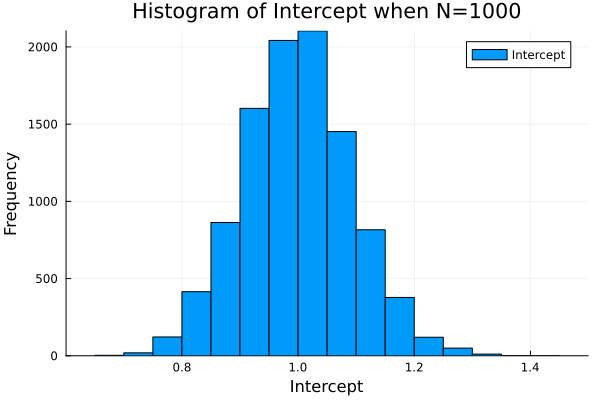

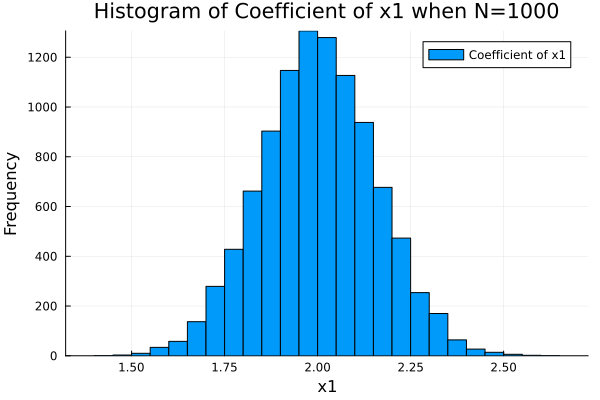

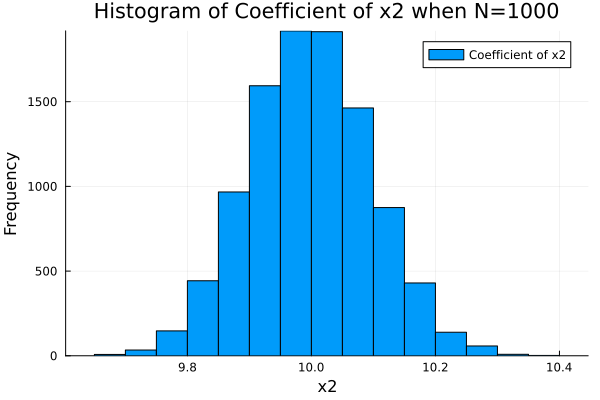

In [20]:
# For N=1000 Summarize the coefficients and plot historgrams
coef_summary2 = describe(select(df_sim2, [:intercept_coef, :x1_coef, :x2_coef]))
hist_sim2_intercept=histogram(df_sim2.intercept_coef, bins=30, title="Histogram of Intercept when N=1000", xlabel="Intercept", ylabel="Frequency", label="Intercept")
hist_sim2_x1=histogram(df_sim2.x1_coef, bins=30, title="Histogram of Coefficient of x1 when N=1000", xlabel="x1", ylabel="Frequency", label="Coefficient of x1")
hist_sim2_x2=histogram(df_sim2.x2_coef, bins=30, title="Histogram of Coefficient of x2 when N=1000", xlabel="x2", ylabel="Frequency", label="Coefficient of x2")
display(hist_sim2_intercept)
display(hist_sim2_x1)
display(hist_sim2_x2)

As $N$ increases from $10$ to $1000$, the coeficients converge to the population value or the one we used to construct $y$ and the distribution looks more like normal distribution as the Central Limit Theorem takes effect.

*Need to think more about the standard error.

8. Set up a program or function that does the following:

    (a) Clear all variables and set number of observations to $N$

    (b) Generate $x_1, x_2, u$

    (c) Regress $y$ on $x_1, x_2$, where y$ where $y = 1 + 2x_1 + 10x_2 + u$

    (d) Test for $b_0$=1 and $b_1=2$
    
    (e) Retrieve Fisher statistic


Simulate the program $10000$ times for $N = 10$ and $N = 1000$. Summarize the dataset obtained and plot a histogram of statistics for $N = 10$ and $N = 1000$

In [64]:
# Define the function to generate the random variables, run the regression and conduct the test and return F-statistic
function f(N)
    x_1 = rand(N)
    x_2 = rand(Binomial(1, 0.3), N)
    u_plus_1 = rand(Chisq(1), N)
    u = u_plus_1 .- 1
    y=2x_1+10x_2+u.+1
    df_p8 = DataFrame(x_1 = x_1, x_2 = x_2, y = y, u = u)
    model=lm(@formula(y ~ x_1+x_2), df_p8)
    coefs=coef(model)
    b0=coefs[1]
    b1=coefs[2]
    se=stderror(model)
    se_b0=se[1]
    se_b1=se[2]
    F_b0=((b0-1)^2)/(se_b0^2)
    F_b1=((b1-2)^2)/(se_b1^2)
    return F_b0, F_b1
end

f (generic function with 1 method)

In [65]:
# Repeat the function for 10000 times
n = 10000
F_b0_vals = zeros(n)
F_b1_vals = zeros(n)
for i in 1:n
    F_b0_vals[i], F_b1_vals[i] = f(10)
end
df_p8 = DataFrame(F_b0_vals = F_b0_vals, F_b1_vals = F_b1_vals)
first(df_p8, 5)

Row,F_b0_vals,F_b1_vals
,Float64,Float64
1,9.07967,3.97143
2,3.60763,3.71385
3,1.46454,0.427435
4,0.0168127,0.910711
5,0.0796627,0.441765


In [66]:
# Summarize the F-statistics
F_summary = describe(select(df_p8, [:F_b0_vals, :F_b1_vals]))

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Int64,DataType
1,F_b0_vals,2.0433,1.06001e-9,0.614195,314.908,0,Float64
2,F_b1_vals,1.34441,3.46127e-12,0.533427,68.7361,0,Float64


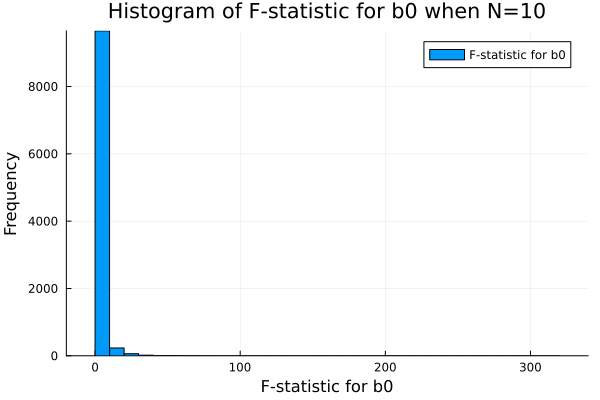

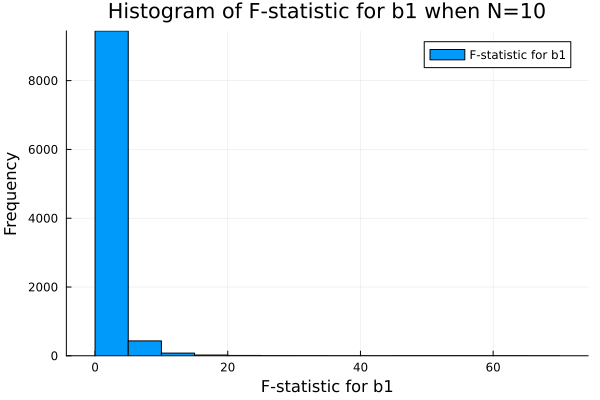

In [67]:
# Plot the histogram of the F-statistics
hist_F_b0=histogram(df_p8.F_b0_vals, bins=30, title="Histogram of F-statistic for b0 when N=10", xlabel="F-statistic for b0", ylabel="Frequency", label="F-statistic for b0")
hist_F_b1=histogram(df_p8.F_b1_vals, bins=30, title="Histogram of F-statistic for b1 when N=10", xlabel="F-statistic for b1", ylabel="Frequency", label="F-statistic for b1")
display(hist_F_b0)
display(hist_F_b1)

In [68]:
# Repeat the function for 10000 times with N=1000
F_b0_vals = zeros(n)
F_b1_vals = zeros(n)
for i in 1:n
    F_b0_vals[i], F_b1_vals[i] = f(1000)
end
df_p8_2 = DataFrame(F_b0_vals = F_b0_vals, F_b1_vals = F_b1_vals)
first(df_p8_2, 5)
F_summary = describe(select(df_p8_2, [:F_b0_vals, :F_b1_vals]))


Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Int64,DataType
1,F_b0_vals,1.01654,1.31483e-8,0.460723,19.4619,0,Float64
2,F_b1_vals,1.0088,9.77434e-8,0.456149,18.9321,0,Float64


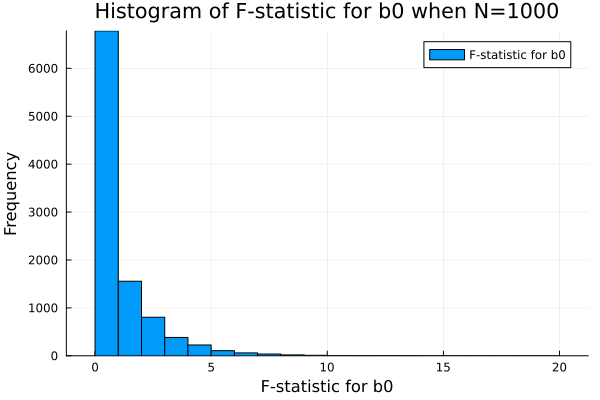

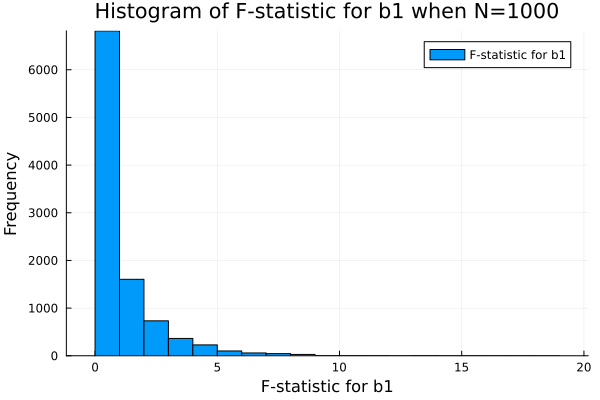

In [69]:
# Plot the histogram of the F-statistics
hist_F_b0_2=histogram(df_p8_2.F_b0_vals, bins=30, title="Histogram of F-statistic for b0 when N=1000", xlabel="F-statistic for b0", ylabel="Frequency", label="F-statistic for b0")
hist_F_b1_2=histogram(df_p8_2.F_b1_vals, bins=30, title="Histogram of F-statistic for b1 when N=1000", xlabel="F-statistic for b1", ylabel="Frequency", label="F-statistic for b1")
display(hist_F_b0_2)
display(hist_F_b1_2)

The F-stats gets smaller due to the fact that the numerator when calculating F-stats, namely the difference between the estimated coefficient and the corresponding true value gets smaller, gets smallers. In other words, we have more precision.

9. Evaluate the precision of Monte Carlo simulations through the following:

    (a) What are the critical values at the $1$ and $5$ percent significance level above which the test hypothesis can be rejected?

    (b) How many observations from each of the $N = 10$ and $N = 1000$ simulations are abovethe $1$ and $5$ percent critical values? What do you observe?

    (c) How many observations should we have observed to exceed the critical value, had the distribution of the error terms been normal (i.e. F stat followed an F distribution)? How does this compare to what we observed in the Monte Carlo simulations?


In [72]:
# Calculate the critical values for the F-distribution
df1 = 2 
df2 = 10 - 3  
df2_large = 1000 - 3  

# Critical values for 1% significance level
critical_value_1_percent = quantile(FDist(df1, df2), 0.99)
critical_value_1_percent_large = quantile(FDist(df1, df2_large), 0.99)

# Critical values for 5% significance level
critical_value_5_percent = quantile(FDist(df1, df2), 0.95)
critical_value_5_percent_large = quantile(FDist(df1, df2_large), 0.95)

3.004751748095238

In [74]:
# For N=10, b0
percent_10_0_1 = sum(df_p8.F_b0_vals .> critical_value_1_percent) / n * 100
percent_10_0_5 = sum(df_p8.F_b0_vals .> critical_value_5_percent) / n * 100
println("Percentage of observations above 1% critical value: ", percent_10_0_1, "%")
println("Percentage of observations above 5% critical value: ", percent_10_0_5, "%")

Percentage of observations above 1% critical value: 3.7600000000000002%
Percentage of observations above 5% critical value: 9.629999999999999%


In [75]:
# For N=10, b1
percent_10_1_1 = sum(df_p8.F_b1_vals .> critical_value_1_percent) / n * 100
percent_10_1_5 = sum(df_p8.F_b1_vals .> critical_value_5_percent) / n * 100
println("Percentage of observations above 1% critical value: ", percent_10_1_1, "%")
println("Percentage of observations above 5% critical value: ", percent_10_1_5, "%")

Percentage of observations above 1% critical value: 1.4000000000000001%
Percentage of observations above 5% critical value: 6.0%


In [76]:
# For N=1000, b0
percent_1000_0_1 = sum(df_p8_2.F_b0_vals .> critical_value_1_percent_large) / n * 100
percent_1000_0_5 = sum(df_p8_2.F_b0_vals .> critical_value_5_percent_large) / n * 100
println("Percentage of observations above 1% critical value: ", percent_1000_0_1, "%")
println("Percentage of observations above 5% critical value: ", percent_1000_0_5, "%")

Percentage of observations above 1% critical value: 3.08%
Percentage of observations above 5% critical value: 8.57%


In [77]:
# For N=1000, b1
percent_1000_1_1 = sum(df_p8_2.F_b1_vals .> critical_value_1_percent_large) / n * 100
percent_1000_1_5 = sum(df_p8_2.F_b1_vals .> critical_value_5_percent_large) / n * 100
println("Percentage of observations above 1% critical value: ", percent_1000_1_1, "%")
println("Percentage of observations above 5% critical value: ", percent_1000_1_5, "%")

Percentage of observations above 1% critical value: 3.2%
Percentage of observations above 5% critical value: 8.43%


At each significance level, we should observe similar percentage of observations that have F-stats exceeds critical values; however, we witness a larger percentage of observations than expected. This phenomen may be attributed to the non-normal errors.